In [15]:
import pickle
import pytz
import utils
import elasticsearch
import settings
from datetime import datetime
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import glob
import sys
import os

In [6]:
avg_over_min = 1

In [71]:
knn = pickle.load(open('knn_pickle_file_sonycAQ', 'rb'))

In [47]:
en_date = datetime.now().strftime("%Y-%m-%dT%H:%M:%S")
st_date = '2022-06-16T00:00:00'

en_date_dt = datetime.strptime(en_date, '%Y-%m-%dT%H:%M:%S').astimezone(pytz.timezone('America/New_York'))
st_date_dt = datetime.strptime(st_date, '%Y-%m-%dT%H:%M:%S').astimezone(pytz.timezone('America/New_York'))

st_date_utc = datetime.strptime(st_date, '%Y-%m-%dT%H:%M:%S').astimezone(pytz.UTC).strftime('%Y-%m-%dT%H:%M:%SZ')
en_date_utc = datetime.strptime(en_date, '%Y-%m-%dT%H:%M:%S').astimezone(pytz.UTC).strftime('%Y-%m-%dT%H:%M:%SZ')

In [48]:
weather_station_url = 'https://www.wunderground.com/dashboard/pws/KNYNEWYO589'
with open('stations.txt', 'w')as fp:
    fp.write(weather_station_url)

filePath = glob.glob('*.csv')
for i in filePath:
    if os.path.exists(i):
        os.remove(i)
py_path = sys.executable
os.system(py_path + ' weather_scraper.py --st_date %s --en_date %s' % (st_date_dt.date(), en_date_dt.date()))

https://www.wunderground.com/dashboard/pws/KNYNEWYO589

** Initializing binary search to find the first date with data **
low is 0 - 2022-06-16
high is 15 - 2022-07-01
mid is 7 - 2022-06-23
----//----
low is 0 - 2022-06-16
high is 6 - 2022-06-22
mid is 3 - 2022-06-19
----//----
low is 0 - 2022-06-16
high is 2 - 2022-06-18
mid is 1 - 2022-06-17
----//----
low is 0 - 2022-06-16
high is 0 - 2022-06-16
mid is 0 - 2022-06-16
----//----

First date not found!
🌞 🌨 ⛈ from https://www.wunderground.com/dashboard/pws/KNYNEWYO589/table/2022-06-16/2022-06-16/daily
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! pro

0

range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty row in the data
list index out of range! probably caused by an empty

In [49]:
df_weather = pd.read_csv(glob.glob('*.csv')[0])
df_weather['ts'] = pd.to_datetime(df_weather["Date"] + ' ' + df_weather['Time']).dt.tz_localize(tz='US/Eastern')
df_weather = df_weather.set_index('ts').resample('%iT' % avg_over_min).mean().fillna(method='ffill').fillna(method='bfill')
df_weather = df_weather.loc[st_date:en_date]
df_weather = df_weather.loc[st_date:en_date]
df_weather = df_weather[['Temperature_C', 'Humidity_%']]

278 rows
🌞 🌨 ⛈ from https://www.wunderground.com/dashboard/pws/KNYNEWYO589/table/2022-06-20/2022-06-20/daily
Saving 285 rows
🌞 🌨 ⛈ from https://www.wunderground.com/dashboard/pws/KNYNEWYO589/table/2022-06-21/2022-06-21/daily
Saving 284 rows
🌞 🌨 ⛈ from https://www.wunderground.com/dashboard/pws/KNYNEWYO589/table/2022-06-22/2022-06-22/daily
Saving 272 rows
🌞 🌨 ⛈ from https://www.wunderground.com/dashboard/pws/KNYNEWYO589/table/2022-06-23/2022-06-23/daily
Saving 282 rows
🌞 🌨 ⛈ from https://www.wunderground.com/dashboard/pws/KNYNEWYO589/table/2022-06-24/2022-06-24/daily
Saving 285 rows
🌞 🌨 ⛈ from https://www.wunderground.com/dashboard/pws/KNYNEWYO589/table/2022-06-25/2022-06-25/daily
Saving 287 rows
🌞 🌨 ⛈ from https://www.wunderground.com/dashboard/pws/KNYNEWYO589/table/2022-06-26/2022-06-26/daily
Saving 277 rows
🌞 🌨 ⛈ from https://www.wunderground.com/dashboard/pws/KNYNEWYO589/table/2022-06-27/2022-06-27/daily
list index out of range! probably caused by an empty row in the data
list index

In [51]:
df_weather

,Temperature_C,Humidity_%
ts,,
2022-06-16 00:04:00-04:00,19.61,80.0
2022-06-16 00:05:00-04:00,19.61,80.0
2022-06-16 00:06:00-04:00,19.61,80.0
2022-06-16 00:07:00-04:00,19.61,80.0
2022-06-16 00:08:00-04:00,19.61,80.0
...,...,...
2022-07-01 21:15:00-04:00,28.56,70.0
2022-07-01 21:16:00-04:00,28.56,70.0
2022-07-01 21:17:00-04:00,28.56,70.0


In [52]:
es = elasticsearch.Elasticsearch('https://es.master1.sonycproject.com', http_auth=('elastic', settings.es_password))

In [75]:
sensor_list = ['sonycnode-dca632ceb490', 'sonycnode-dca632ceb547', 'sonycnode-dca632ceb529', 'sonycnode-dca632ceb559', 'sonycnode-dca632ceb48d']


{'query': {'bool': {'must': [{'term': {'fqdn.keyword': 'sonycnode-dca632ceb490'}}, {'range': {'time': {'gte': '2022-06-16T04:00:00Z', 'lte': '2022-07-02T01:20:14Z'}}}]}}}


0it [00:00, ?it/s]

0. n hits: 1000. 2022-06-20T12:50:37.228188 - 2022-06-20T20:01:47.924448
1. n hits: 1000. 2022-06-20T19:55:02.853335 - 2022-06-21T03:38:18.807038
2. n hits: 1000. 2022-06-21T02:42:43.138290 - 2022-06-21T05:13:45.033333
3. n hits: 1000. 2022-06-21T04:05:19.183191 - 2022-06-21T11:59:40.414287
4. n hits: 1000. 2022-06-21T10:46:49.468225 - 2022-06-21T13:07:16.277884
5. n hits: 1000. 2022-06-21T05:18:30.109234 - 2022-06-21T13:08:01.305772
6. n hits: 1000. 2022-06-21T05:18:40.091211 - 2022-06-21T14:45:02.698103
7. n hits: 1000. 2022-06-21T06:26:00.972548 - 2022-06-21T14:06:07.166140
8. n hits: 1000. 2022-06-21T07:52:52.275380 - 2022-06-22T06:26:54.896855
9. n hits: 1000. 2022-06-21T16:19:43.809855 - 2022-06-22T06:27:14.909321
10. n hits: 1000. 2022-06-21T22:33:03.690924 - 2022-06-22T07:40:55.892003
11. n hits: 1000. 2022-06-22T06:26:59.919605 - 2022-06-22T08:45:51.693846
12. n hits: 1000. 2022-06-22T07:41:20.866438 - 2022-06-22T09:49:42.552802
13. n hits: 1000. 2022-06-22T09:43:42.446906 - 2

111. n hits: 1000. 2022-06-17T01:13:02.823599 - 2022-06-17T02:44:28.885123
112. n hits: 1000. 2022-06-16T19:53:28.612392 - 2022-06-17T04:44:25.405594
113. n hits: 1000. 2022-06-17T04:29:45.271476 - 2022-06-23T17:55:37.860627
114. n hits: 1000. 2022-06-23T12:07:33.345941 - 2022-06-23T18:19:43.201694
115. n hits: 1000. 2022-06-23T12:07:28.315669 - 2022-06-23T19:20:28.962808
116. n hits: 1000. 2022-06-23T13:10:24.097769 - 2022-06-23T20:14:54.856963
117. n hits: 1000. 2022-06-23T13:10:14.121592 - 2022-06-23T21:03:20.440176
118. n hits: 1000. 2022-06-23T14:05:09.767266 - 2022-06-23T21:03:25.448584
119. n hits: 1000. 2022-06-22T04:13:18.114824 - 2022-06-23T21:44:50.974424
120. n hits: 1000. 2022-06-21T21:51:43.264754 - 2022-06-24T01:25:08.840483
121. n hits: 1000. 2022-06-24T00:25:43.118253 - 2022-06-24T18:09:52.031866
122. n hits: 1000. 2022-06-24T17:19:06.405981 - 2022-06-24T19:11:37.905681
123. n hits: 1000. 2022-06-24T16:03:05.396382 - 2022-06-24T23:21:26.172316
124. n hits: 1000. 2022-0

222. n hits: 1000. 2022-06-27T22:50:42.364837 - 2022-07-01T02:20:50.207256
223. n hits: 1000. 2022-06-27T22:50:47.359833 - 2022-06-28T06:56:33.782456
224. n hits: 1000. 2022-06-28T05:55:52.947923 - 2022-06-28T08:51:25.295954
225. n hits: 1000. 2022-06-27T23:53:08.166153 - 2022-06-28T07:53:49.490927
226. n hits: 1000. 2022-06-27T23:53:18.135087 - 2022-06-28T09:41:30.943521
227. n hits: 1000. 2022-06-27T20:06:10.188586 - 2022-06-28T10:21:36.504615
228. n hits: 1000. 2022-06-27T20:11:45.230840 - 2022-06-30T15:54:40.869079
229. n hits: 1000. 2022-06-30T14:58:15.051257 - 2022-06-30T19:25:19.228892
230. n hits: 1000. 2022-06-30T15:55:15.897914 - 2022-06-30T19:25:29.214211
231. n hits: 1000. 2022-06-30T16:52:46.929013 - 2022-06-30T20:52:20.352446
232. n hits: 1000. 2022-06-29T21:35:29.693115 - 2022-06-30T21:00:15.465977
233. n hits: 1000. 2022-06-29T21:38:09.741848 - 2022-06-30T05:55:32.447814
234. n hits: 1000. 2022-06-29T23:52:16.715652 - 2022-06-30T06:24:32.793739
235. n hits: 1000. 2022-0

0it [00:00, ?it/s]

0. n hits: 1000. 2022-06-18T06:22:44.500950 - 2022-06-18T07:55:05.613059
1. n hits: 1000. 2022-06-18T06:29:49.570988 - 2022-06-18T15:44:36.626432
2. n hits: 1000. 2022-06-18T07:59:15.680081 - 2022-06-18T16:58:42.637167
3. n hits: 1000. 2022-06-18T07:55:15.602461 - 2022-06-18T17:20:17.921544
4. n hits: 1000. 2022-06-18T09:16:26.725510 - 2022-06-18T18:06:18.481396
5. n hits: 1000. 2022-06-18T09:15:56.710047 - 2022-06-18T11:29:23.540769
6. n hits: 1000. 2022-06-18T10:26:57.638711 - 2022-06-18T19:02:34.195361
7. n hits: 1000. 2022-06-18T11:29:58.513245 - 2022-06-18T19:52:19.876327
8. n hits: 1000. 2022-06-18T11:29:48.496678 - 2022-06-18T23:12:17.384919
9. n hits: 1000. 2022-06-18T21:52:26.363148 - 2022-06-19T00:28:58.390938
10. n hits: 1000. 2022-06-18T23:12:57.422985 - 2022-06-19T06:43:18.279761
11. n hits: 1000. 2022-06-19T00:29:38.405009 - 2022-06-19T06:41:58.253622
12. n hits: 1000. 2022-06-19T01:33:49.137264 - 2022-06-19T08:38:44.734017
13. n hits: 1000. 2022-06-19T05:22:12.173940 - 2

112. n hits: 1000. 2022-06-20T23:27:09.637395 - 2022-06-21T13:51:32.807042
113. n hits: 1000. 2022-06-20T23:47:34.873006 - 2022-06-22T01:48:03.568641
114. n hits: 1000. 2022-06-21T13:51:37.773133 - 2022-06-22T02:32:39.584909
115. n hits: 1000. 2022-06-22T01:48:08.667978 - 2022-06-22T22:42:27.820349
116. n hits: 1000. 2022-06-22T08:01:31.449196 - 2022-06-23T20:24:59.442694
117. n hits: 1000. 2022-06-23T13:57:07.560317 - 2022-06-23T21:14:40.257455
118. n hits: 1000. 2022-06-23T13:57:02.472480 - 2022-06-23T22:18:41.570115
119. n hits: 1000. 2022-06-23T15:06:18.908956 - 2022-06-23T22:18:46.883570
120. n hits: 1000. 2022-06-23T15:06:48.935790 - 2022-06-23T23:16:17.683708
121. n hits: 1000. 2022-06-23T16:08:54.685313 - 2022-06-23T17:53:26.239047
122. n hits: 1000. 2022-06-23T17:14:20.664379 - 2022-06-24T00:03:08.904538
123. n hits: 1000. 2022-06-23T17:54:01.264616 - 2022-06-24T09:36:48.699032
124. n hits: 1000. 2022-06-24T02:11:41.222904 - 2022-06-24T09:36:53.716162
125. n hits: 1000. 2022-0

222. n hits: 1000. 2022-06-26T14:05:35.264137 - 2022-06-26T22:30:59.533586
223. n hits: 1000. 2022-06-26T16:31:47.176042 - 2022-06-26T23:42:26.316952
224. n hits: 1000. 2022-06-26T15:23:26.295617 - 2022-06-26T17:23:52.912795
225. n hits: 1000. 2022-06-26T15:24:56.357385 - 2022-06-27T00:44:57.491103
226. n hits: 1000. 2022-06-26T17:23:57.914587 - 2022-06-27T01:40:48.438970
227. n hits: 1000. 2022-06-26T17:24:07.870504 - 2022-06-27T02:43:04.599887
228. n hits: 1000. 2022-06-27T02:29:09.384769 - 2022-06-30T18:32:28.467455
229. n hits: 1000. 2022-06-30T17:26:36.970409 - 2022-06-30T19:33:30.051600
230. n hits: 1000. 2022-06-30T19:31:10.115915 - 2022-07-01T02:47:41.152649
231. n hits: 1000. 2022-06-30T19:33:35.018750 - 2022-07-01T03:38:42.242036
232. n hits: 1000. 2022-06-30T20:29:41.393191 - 2022-07-01T04:23:13.381371
233. n hits: 1000. 2022-06-30T21:19:52.920036 - 2022-07-01T05:28:24.913809
234. n hits: 1000. 2022-06-29T04:21:00.671168 - 2022-07-01T05:28:30.037266
235. n hits: 1000. 2022-0

0it [00:00, ?it/s]

0. n hits: 1000. 2022-06-20T12:50:35.796179 - 2022-06-20T20:00:26.549950
1. n hits: 1000. 2022-06-20T19:55:06.486993 - 2022-06-21T03:38:17.602065
2. n hits: 1000. 2022-06-21T02:42:46.752265 - 2022-06-21T05:07:33.727823
3. n hits: 1000. 2022-06-21T04:05:27.882501 - 2022-06-21T11:59:19.103466
4. n hits: 1000. 2022-06-21T10:46:53.124006 - 2022-06-21T13:07:14.979050
5. n hits: 1000. 2022-06-21T05:18:38.827568 - 2022-06-21T13:07:59.972580
6. n hits: 1000. 2022-06-21T05:18:28.872576 - 2022-06-21T14:45:01.192165
7. n hits: 1000. 2022-06-21T06:26:19.691644 - 2022-06-21T14:06:10.709008
8. n hits: 1000. 2022-06-21T07:53:00.958342 - 2022-06-22T06:26:58.534508
9. n hits: 1000. 2022-06-21T16:19:42.422861 - 2022-06-22T06:27:13.520033
10. n hits: 1000. 2022-06-21T22:33:22.263799 - 2022-06-22T07:40:54.521785
11. n hits: 1000. 2022-06-22T06:27:18.568222 - 2022-06-22T08:45:50.436283
12. n hits: 1000. 2022-06-22T07:41:14.478674 - 2022-06-22T09:46:06.226778
13. n hits: 1000. 2022-06-22T09:43:51.158162 - 2

111. n hits: 1000. 2022-06-24T21:57:03.750241 - 2022-06-25T00:45:55.910010
112. n hits: 1000. 2022-06-25T00:27:00.691086 - 2022-06-25T02:16:47.152439
113. n hits: 1000. 2022-06-25T01:06:41.188649 - 2022-06-25T03:40:53.149234
114. n hits: 1000. 2022-06-25T03:19:32.863972 - 2022-06-25T05:00:54.226200
115. n hits: 1000. 2022-06-25T04:14:08.679629 - 2022-06-25T06:52:05.782499
116. n hits: 1000. 2022-06-24T01:26:42.777751 - 2022-06-25T07:11:41.067524
117. n hits: 1000. 2022-06-24T01:26:47.826547 - 2022-06-24T06:45:11.945515
118. n hits: 1000. 2022-06-24T06:28:16.680832 - 2022-06-24T08:18:43.189664
119. n hits: 1000. 2022-06-24T07:10:32.239671 - 2022-06-24T09:25:09.084721
120. n hits: 1000. 2022-06-23T21:44:59.968579 - 2022-06-24T09:47:04.318413
121. n hits: 1000. 2022-06-23T15:35:19.832774 - 2022-06-24T04:14:04.864086
122. n hits: 1000. 2022-06-23T16:09:10.521197 - 2022-06-24T04:40:10.262093
123. n hits: 1000. 2022-06-23T16:35:50.818499 - 2022-06-25T13:28:31.095659
124. n hits: 1000. 2022-0

221. n hits: 1000. 2022-06-28T21:55:39.174477 - 2022-06-30T06:37:50.271867
222. n hits: 1000. 2022-06-28T16:01:19.445647 - 2022-06-29T04:14:19.350056
223. n hits: 1000. 2022-06-28T16:01:29.389290 - 2022-06-29T04:40:14.774679
224. n hits: 1000. 2022-06-28T22:58:50.026018 - 2022-06-29T16:34:44.470935
225. n hits: 1000. 2022-06-29T06:35:01.342377 - 2022-06-29T16:35:39.480101
226. n hits: 1000. 2022-06-29T11:20:20.128678 - 2022-06-29T17:04:19.828098
227. n hits: 1000. 2022-06-29T10:42:09.548689 - 2022-06-29T17:42:15.353997
228. n hits: 1000. 2022-06-28T01:32:58.196233 - 2022-06-29T17:50:20.465049
229. n hits: 1000. 2022-06-28T02:31:53.975629 - 2022-06-28T17:29:35.682368
230. n hits: 1000. 2022-06-28T03:09:14.487480 - 2022-06-30T18:02:49.353420
231. n hits: 1000. 2022-06-30T11:53:59.446224 - 2022-07-01T09:46:36.710071
232. n hits: 1000. 2022-07-01T02:21:25.869217 - 2022-07-01T10:12:42.110750
233. n hits: 1000. 2022-07-01T02:20:55.858526 - 2022-07-01T04:41:42.786037
234. n hits: 1000. 2022-0

0it [00:00, ?it/s]

0. n hits: 1000. 2022-06-20T13:36:09.766275 - 2022-06-20T21:13:26.175203
1. n hits: 1000. 2022-06-20T19:55:05.150748 - 2022-06-21T04:05:16.387774
2. n hits: 1000. 2022-06-21T02:42:45.287089 - 2022-06-21T05:18:22.331869
3. n hits: 1000. 2022-06-21T04:05:41.367260 - 2022-06-21T11:59:37.311762
4. n hits: 1000. 2022-06-21T05:18:37.311545 - 2022-06-21T13:08:08.099065
5. n hits: 1000. 2022-06-21T05:18:32.361303 - 2022-06-21T14:44:34.337121
6. n hits: 1000. 2022-06-21T06:26:03.211120 - 2022-06-21T14:44:59.338355
7. n hits: 1000. 2022-06-21T06:34:48.227993 - 2022-06-21T17:28:11.366539
8. n hits: 1000. 2022-06-21T16:20:10.540632 - 2022-06-21T23:46:36.068191
9. n hits: 1000. 2022-06-20T14:13:00.827865 - 2022-06-21T23:45:21.096796
10. n hits: 1000. 2022-06-20T21:13:31.175789 - 2022-06-20T23:23:42.772588
11. n hits: 1000. 2022-06-20T15:22:56.738298 - 2022-06-20T23:23:52.698004
12. n hits: 1000. 2022-06-20T15:24:11.778833 - 2022-06-21T00:18:28.481285
13. n hits: 1000. 2022-06-20T16:25:12.495322 - 2

112. n hits: 1000. 2022-06-26T13:16:36.851798 - 2022-06-26T20:58:32.931061
113. n hits: 1000. 2022-06-26T20:24:32.507349 - 2022-06-27T13:46:41.333302
114. n hits: 1000. 2022-06-27T12:50:40.637214 - 2022-06-27T15:58:12.995772
115. n hits: 1000. 2022-06-27T14:59:02.328059 - 2022-06-27T16:55:58.743191
116. n hits: 1000. 2022-06-27T16:01:43.044933 - 2022-06-27T18:23:25.112608
117. n hits: 1000. 2022-06-27T17:43:59.563692 - 2022-06-27T19:30:56.016631
118. n hits: 1000. 2022-06-26T23:42:10.087370 - 2022-06-27T20:06:01.476884
119. n hits: 1000. 2022-06-26T06:03:21.084385 - 2022-06-27T04:18:18.804874
120. n hits: 1000. 2022-06-27T00:44:45.998560 - 2022-06-27T04:35:14.022725
121. n hits: 1000. 2022-06-27T01:40:31.724150 - 2022-06-27T04:42:54.104134
122. n hits: 1000. 2022-06-26T20:58:38.024199 - 2022-06-27T05:06:54.439678
123. n hits: 1000. 2022-06-25T17:26:50.941994 - 2022-06-27T05:43:44.925169
124. n hits: 1000. 2022-06-25T16:24:55.189535 - 2022-06-26T00:21:46.575682
125. n hits: 1000. 2022-0

0it [00:00, ?it/s]

0. n hits: 1000. 2022-06-20T12:50:36.099659 - 2022-06-20T19:58:13.813232
1. n hits: 1000. 2022-06-20T19:55:03.844484 - 2022-06-21T03:38:17.296945
2. n hits: 1000. 2022-06-21T02:42:46.029198 - 2022-06-21T05:07:33.622963
3. n hits: 1000. 2022-06-21T04:05:37.628695 - 2022-06-21T11:59:39.832264
4. n hits: 1000. 2022-06-21T10:46:48.691182 - 2022-06-21T13:07:11.114844
5. n hits: 1000. 2022-06-21T05:18:33.960246 - 2022-06-21T13:08:06.301924
6. n hits: 1000. 2022-06-21T05:18:28.791744 - 2022-06-21T14:45:02.938252
7. n hits: 1000. 2022-06-21T06:26:19.924514 - 2022-06-21T14:06:12.160106
8. n hits: 1000. 2022-06-21T07:52:51.214096 - 2022-06-22T06:26:54.052804
9. n hits: 1000. 2022-06-21T16:19:44.606765 - 2022-06-22T06:27:14.100410
10. n hits: 1000. 2022-06-21T22:33:01.875180 - 2022-06-22T07:40:55.064248
11. n hits: 1000. 2022-06-22T06:26:59.075844 - 2022-06-22T08:45:50.970316
12. n hits: 1000. 2022-06-22T07:41:15.110560 - 2022-06-22T09:43:36.864395
13. n hits: 1000. 2022-06-22T09:42:51.771552 - 2

112. n hits: 1000. 2022-06-23T10:56:23.192775 - 2022-06-23T18:19:45.459946
113. n hits: 1000. 2022-06-23T12:07:29.160707 - 2022-06-23T18:19:00.690200
114. n hits: 1000. 2022-06-23T12:32:24.579341 - 2022-06-23T20:14:47.536528
115. n hits: 1000. 2022-06-23T13:10:10.234533 - 2022-06-23T20:15:07.738088
116. n hits: 1000. 2022-06-23T13:11:15.238707 - 2022-06-23T21:03:28.390601
117. n hits: 1000. 2022-06-23T14:05:21.128800 - 2022-06-23T21:44:33.978726
118. n hits: 1000. 2022-06-22T04:13:22.021382 - 2022-06-23T21:44:54.036113
119. n hits: 1000. 2022-06-21T21:51:46.068490 - 2022-06-24T01:26:27.398133
120. n hits: 1000. 2022-06-24T00:26:21.449086 - 2022-06-24T18:10:21.785738
121. n hits: 1000. 2022-06-24T16:03:14.692147 - 2022-06-24T19:11:42.818153
122. n hits: 1000. 2022-06-24T16:03:04.668085 - 2022-06-24T23:22:36.725628
123. n hits: 1000. 2022-06-24T21:56:55.343463 - 2022-06-25T00:26:07.948587
124. n hits: 1000. 2022-06-24T23:58:42.297651 - 2022-06-25T02:16:49.431397
125. n hits: 1000. 2022-0

223. n hits: 1000. 2022-06-28T06:56:39.273062 - 2022-06-28T08:51:25.746385
224. n hits: 1000. 2022-06-27T23:53:12.834939 - 2022-06-28T09:39:56.727410
225. n hits: 1000. 2022-06-28T00:47:18.558349 - 2022-06-28T09:41:31.426480
226. n hits: 1000. 2022-06-27T20:06:03.402807 - 2022-06-28T10:21:32.041551
227. n hits: 1000. 2022-06-28T01:34:34.528130 - 2022-06-30T16:28:04.108858
228. n hits: 1000. 2022-06-30T15:55:13.373638 - 2022-06-30T19:25:27.086335
229. n hits: 1000. 2022-06-30T16:30:24.005595 - 2022-06-30T19:58:17.699115
230. n hits: 1000. 2022-06-30T04:20:01.558095 - 2022-06-30T21:00:48.790228
231. n hits: 1000. 2022-06-29T21:35:29.582475 - 2022-06-30T05:02:42.244400
232. n hits: 1000. 2022-06-29T22:59:05.977760 - 2022-06-30T05:55:42.873774
233. n hits: 1000. 2022-06-28T21:56:03.252145 - 2022-06-30T06:37:48.618718
234. n hits: 1000. 2022-06-28T21:55:42.909078 - 2022-06-29T04:14:23.759106
235. n hits: 1000. 2022-06-28T16:01:17.249051 - 2022-06-29T04:40:14.098110
236. n hits: 1000. 2022-0

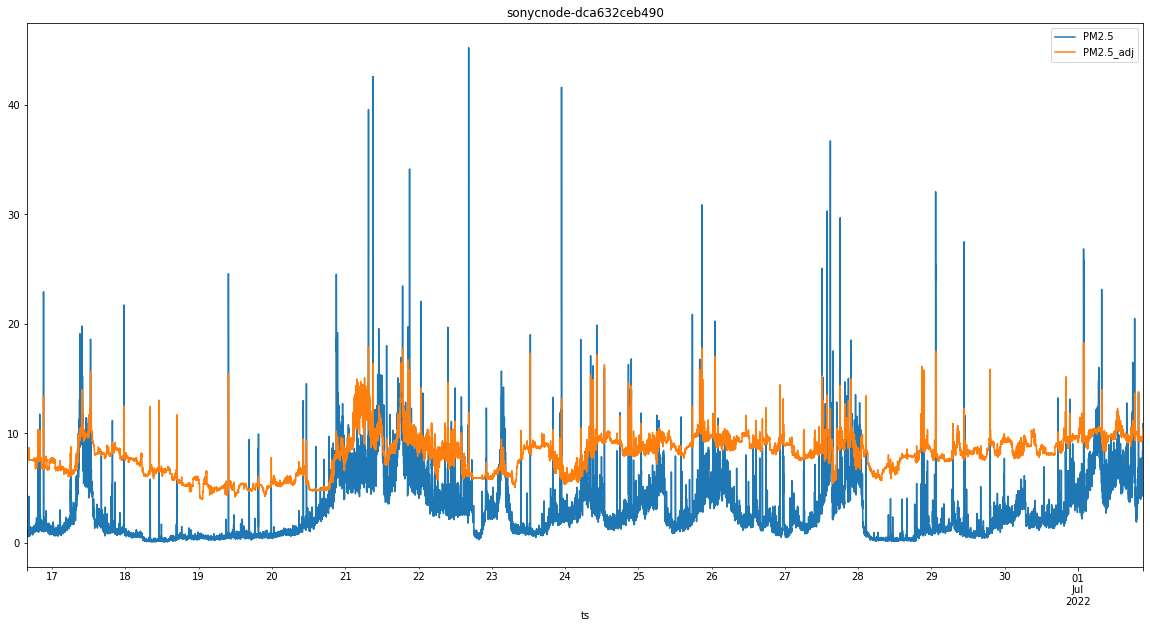

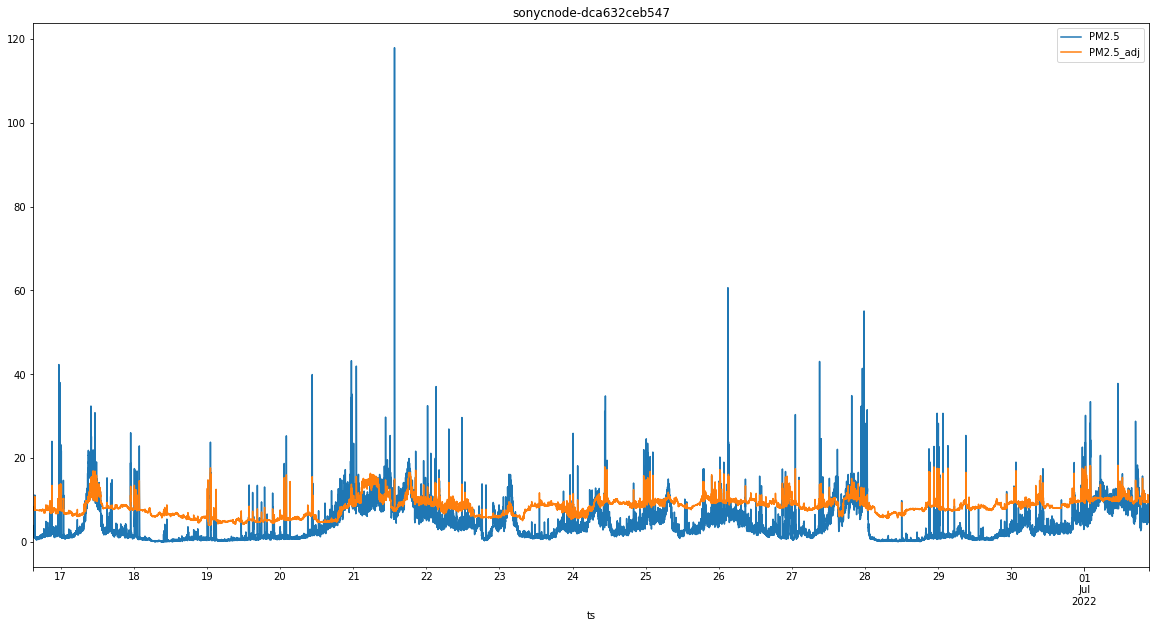

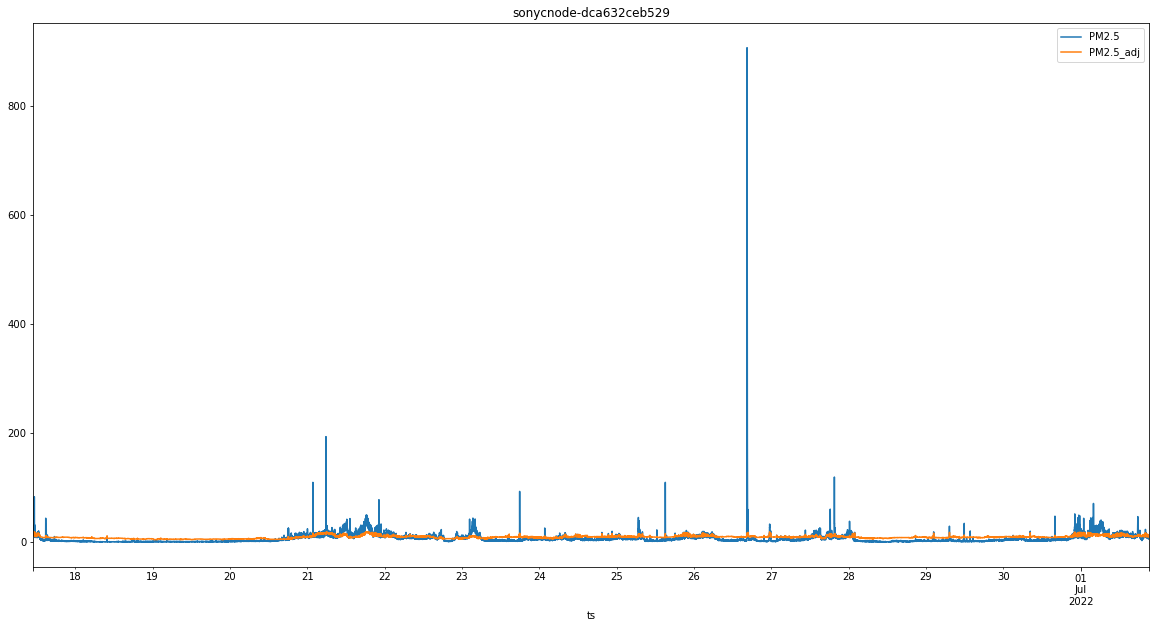

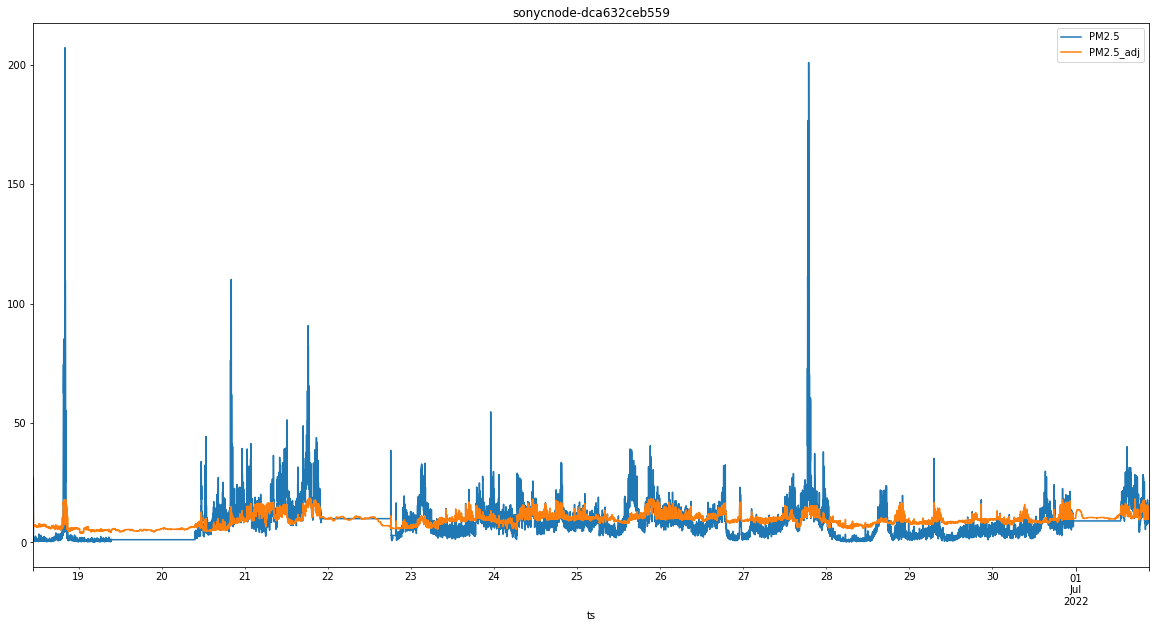

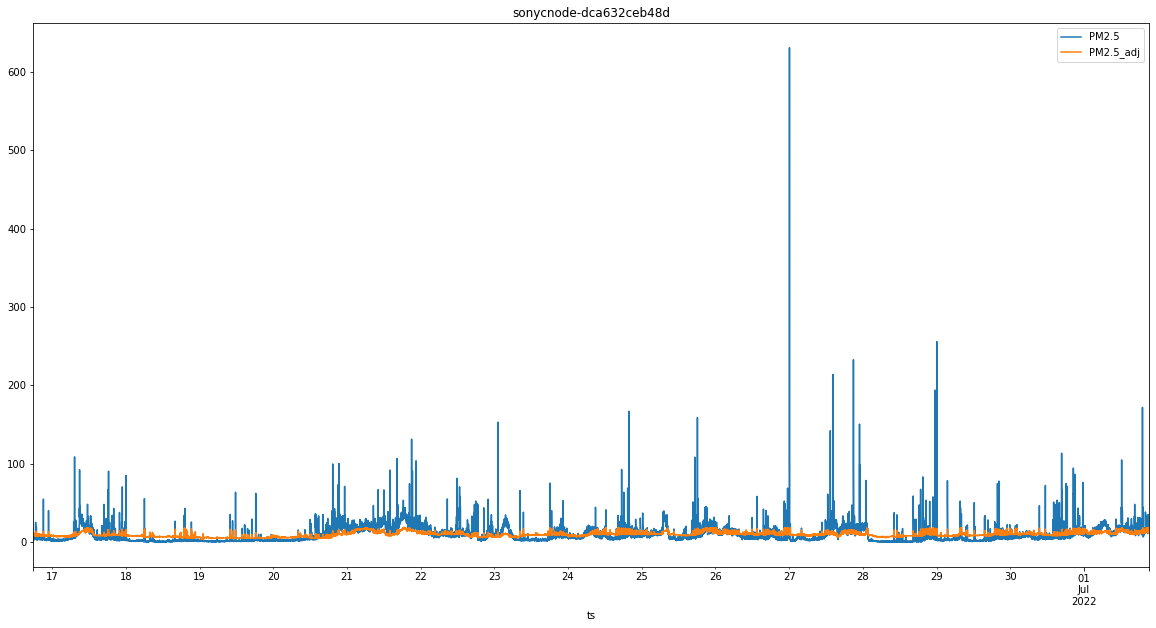

In [188]:
# sensor_list = ['sonycnode-dca632ceb490']
for fqdn in sensor_list:
    
#     if os.path.exists('%s.csv' % fqdn):
#         continue
    
    ss = utils.download_sensor_data(es, 'status', 'fqdn', fqdn, start=st_date_utc, end=en_date_utc, save=False)
    data = {}
    
    aq_data = [ele['aq'] if 'aq' in ele else None for ele in ss]
    data['ts'] = [ele['dt'] if ele != None else None for ele in aq_data]
    
    data['laeq'] = [ele['laeq'] if 'laeq' in ele else None for ele in ss]
    data['lceq'] = [ele['lceq'] if 'lceq' in ele else None for ele in ss]
    data['lzeq'] = [ele['lzeq'] if 'lzeq' in ele else None for ele in ss]
    
    data['PM1.0'] = [ele['PM1.0'] if ele != None else None for ele in aq_data]
    data['PM2.5'] = [ele['PM2.5'] if ele != None else None for ele in aq_data]
    data['PM10'] = [ele['PM10'] if ele != None else None for ele in aq_data]
    
    data['engine'] = [ele['classification']['engine'] if 'classification' in ele else None for ele in ss]
    data['machinery_impact'] = [ele['classification']['machinery_impact'] if 'classification' in ele else None for ele in ss]
    data['non_machinery_impact'] = [ele['classification']['non_machinery_impact'] if 'classification' in ele else None for ele in ss if 'classification' in ele]
    data['powered_saw'] = [ele['classification']['powered_saw'] if 'classification' in ele else None for ele in ss]
    data['human_voice'] = [ele['classification']['human_voice'] if 'classification' in ele else None for ele in ss]
    
    print(len(data['ts']))
    print(len(data['laeq']))
    print(len(data['lceq']))
    print(len(data['lzeq']))
    print(len(data['PM1.0']))
    print(len(data['PM2.5']))
    print(len(data['PM10']))
    print(len(data['engine']))
    print(len(data['machinery_impact']))
    print(len(data['non_machinery_impact']))
    print(len(data['powered_saw']))
    print(len(data['human_voice']))
    
    main_df = pd.DataFrame.from_dict(data, orient='index').transpose()
#     break
#     data['ts'] = pd.to_datetime([datetime.fromtimestamp(int(ele['aq']['dt'])) if 'aq' in ele and 'dt' in ele else None for ele in ss ]).tz_localize(tz='US/Eastern')
    
#     data['laeq'] = [ele['laeq'] if 'laeq' in ele else None for ele in ss]
#     data['lceq'] = [ele['lceq'] if 'lceq' in ele else None for ele in ss]
#     data['lzeq'] = [ele['lzeq'] if 'lzeq' in ele else None for ele in ss]

#     data['PM1.0'] = [ele['aq']['PM1.0'] if 'aq' in ele and 'PM1.0' in ele else None for ele in ss]
#     data['PM2.5'] = [ele['aq']['PM2.5'] if 'aq' in ele and 'PM2.5' in ele else None for ele in ss]
#     data['PM10'] = [ele['aq']['PM10'] if 'aq' in ele and 'PM10' in ele else None for ele in ss]

#     data['engine'] = [ele['classification']['engine'] if 'classification' in ele else None for ele in ss]
#     data['machinery_impact'] = [ele['classification']['machinery_impact'] if 'classification' in ele else None for ele in ss]
#     data['non_machinery_impact'] = [ele['classification']['non_machinery_impact'] if 'classification' in ele else None for ele in ss if 'classification' in ele]
#     data['powered_saw'] = [ele['classification']['powered_saw'] if 'classification' in ele else None for ele in ss]
#     data['human_voice'] = [ele['classification']['human_voice'] if 'classification' in ele else None for ele in ss]
    
#     main_df = pd.DataFrame(data)
    main_df = main_df.sort_values('ts')
    main_df = main_df.fillna(method='ffill').fillna(method='bfill')
    main_df['ts'] = pd.to_datetime(main_df['ts'], unit='s').dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
   
    
    main_df = main_df.set_index('ts').resample('%iT' % avg_over_min).mean()
    main_df = main_df.fillna(method='ffill').fillna(method='bfill')
    main_df = main_df[str(df_weather.index[0]):str(df_weather.index[-1])]
    
    main_df[['temp_c', 'rel_humid']] = df_weather[['Temperature_C', 'Humidity_%']]
    
    knn_input_df = main_df[['PM2.5', 'temp_c', 'rel_humid']].rename(columns={'PM2.5': 'Sensor_O1', 'temp_c': 'Temp', 'rel_humid': 'RelHum'})
    main_df['PM2.5_adj'] = knn.predict(knn_input_df)
    main_df.round(4).to_csv('%s.csv' % fqdn)
    
    main_df[['PM2.5', 'PM2.5_adj']].plot(figsize=(20, 10))
    plt.title(fqdn)
    